In [1]:
# Import necessary libraries
import pandas as pd

file_path = "data.csv"
df = pd.read_csv(file_path)

# Display the first few rows to verify
print(df.head())


  countryIsoCode      country indexCode                    index  dimension  \
0            AFG  Afghanistan       GII  Gender Inequality Index        NaN   
1            AFG  Afghanistan       GII  Gender Inequality Index        NaN   
2            AFG  Afghanistan       GII  Gender Inequality Index        NaN   
3            AFG  Afghanistan       GII  Gender Inequality Index        NaN   
4            AFG  Afghanistan       GII  Gender Inequality Index        NaN   

  indicatorCode                                          indicator  year  \
0           abr  Adolescent Birth Rate (births per 1,000 women ...  1990   
1           abr  Adolescent Birth Rate (births per 1,000 women ...  1991   
2           abr  Adolescent Birth Rate (births per 1,000 women ...  1992   
3           abr  Adolescent Birth Rate (births per 1,000 women ...  1993   
4           abr  Adolescent Birth Rate (births per 1,000 women ...  1994   

     value  note  
0  142.960   NaN  
1  147.525   NaN  
2  147.521 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52934 entries, 0 to 52933
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   countryIsoCode  52934 non-null  object 
 1   country         52934 non-null  object 
 2   indexCode       52934 non-null  object 
 3   index           52934 non-null  object 
 4   dimension       0 non-null      float64
 5   indicatorCode   52934 non-null  object 
 6   indicator       52934 non-null  object 
 7   year            52934 non-null  int64  
 8   value           52934 non-null  float64
 9   note            0 non-null      float64
dtypes: float64(3), int64(1), object(6)
memory usage: 4.0+ MB


In [3]:
df.isnull().sum()

,0
countryIsoCode,0
country,0
indexCode,0
index,0
dimension,52934
indicatorCode,0
indicator,0
year,0
value,0
note,52934


In [4]:
df = df.drop_duplicates()

R² Score: 0.8514
Mean Absolute Error (MAE): 0.0586
Mean Squared Error (MSE): 0.0056

Model Summary:
                                   OLS Regression Results                                  
Dep. Variable:     Gender Inequality Index (value)   R-squared:                       0.852
Model:                                         OLS   Adj. R-squared:                  0.851
Method:                              Least Squares   F-statistic:                     3082.
Date:                             Wed, 19 Feb 2025   Prob (F-statistic):               0.00
Time:                                     23:36:40   Log-Likelihood:                 4457.3
No. Observations:                             3768   AIC:                            -8899.
Df Residuals:                                 3760   BIC:                            -8849.
Df Model:                                        7                                         
Covariance Type:                         nonrobust                      

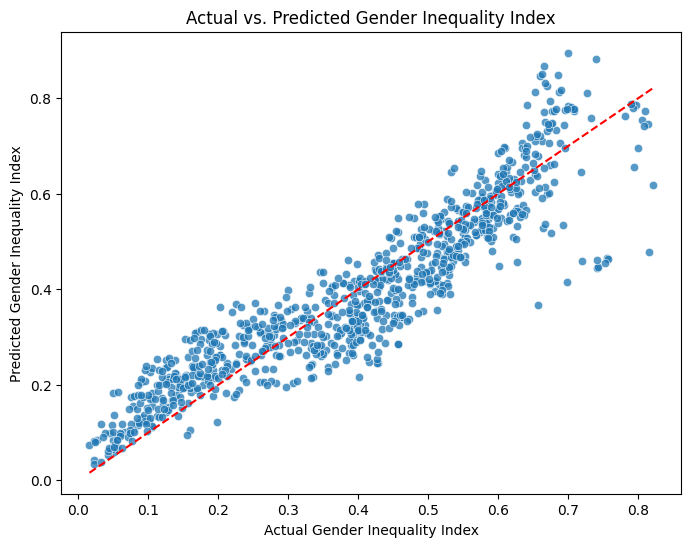

In [60]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load the dataset
file_path = "data.csv"
df = pd.read_csv(file_path)

# Define the independent variables (predictors)
independent_vars = [
    "Adolescent Birth Rate (births per 1,000 women ages 15-19)",
    "Labour force participation rate, female (% ages 15 and older)",
    "Labour force participation rate, male (% ages 15 and older)",
    "Maternal Mortality Ratio (deaths per 100,000 live births)",
    "Share of seats in parliament, female (% held by women)",
    "Share of seats in parliament, male (% held by men)",
    "Population with at least some secondary education, female (% ages 25 and older)",
    "Population with at least some secondary education, male (% ages 25 and older)"
]

# Define the dependent variable (target)
dependent_var = "Gender Inequality Index (value)"

# Filter dataset to exclude 'GII Rank' and keep only relevant indicators
df_filtered = df[df['indicator'].isin(independent_vars + [dependent_var])]
df_filtered = df_filtered[df_filtered['indicator'] != "GII Rank"]

# Pivot data to get indicators as columns and their corresponding values
pivot_df = df_filtered.pivot_table(index=['country', 'year'], columns='indicator', values='value', aggfunc='mean').reset_index()

# Drop non-numeric columns ('country', 'year') and handle missing values
pivot_df = pivot_df.drop(columns=['country', 'year'], errors='ignore').dropna()

# Ensure all values are numeric
pivot_df = pivot_df.apply(pd.to_numeric, errors='coerce')

# Define X (independent variables) and y (dependent variable)
X = pivot_df[independent_vars]
y = pivot_df[dependent_var]

# Add a constant column for the intercept in statsmodels
X = sm.add_constant(X)

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Multiple Linear Regression model using statsmodels
sm_model = sm.OLS(y_train, X_train).fit()

# Make predictions
y_pred = sm_model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Display evaluation metrics
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Print detailed model summary
print("\nModel Summary:")
print(sm_model.summary())

# Feature importance (coefficients)
feature_importance = pd.DataFrame({
    "Feature": ["Intercept"] + independent_vars,
    "Coefficient": sm_model.params.values
}).sort_values(by="Coefficient", ascending=False)


# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.75)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red")  # Perfect prediction line
plt.xlabel("Actual Gender Inequality Index")
plt.ylabel("Predicted Gender Inequality Index")
plt.title("Actual vs. Predicted Gender Inequality Index")
plt.show()



Model Validation Accuracy Metrics (2018-2022) - ARIMA:
Mean Absolute Error (MAE): 0.0163
Mean Squared Error (MSE): 0.0006
R² Score: 0.9792
Mean Absolute Percentage Error (MAPE): 11.10%
Prediction Accuracy: 88.90%


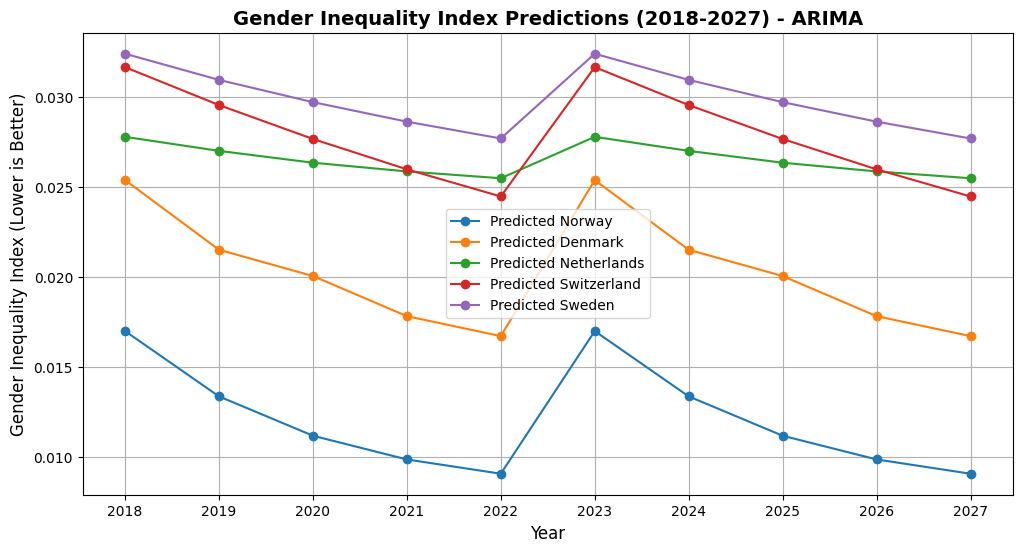

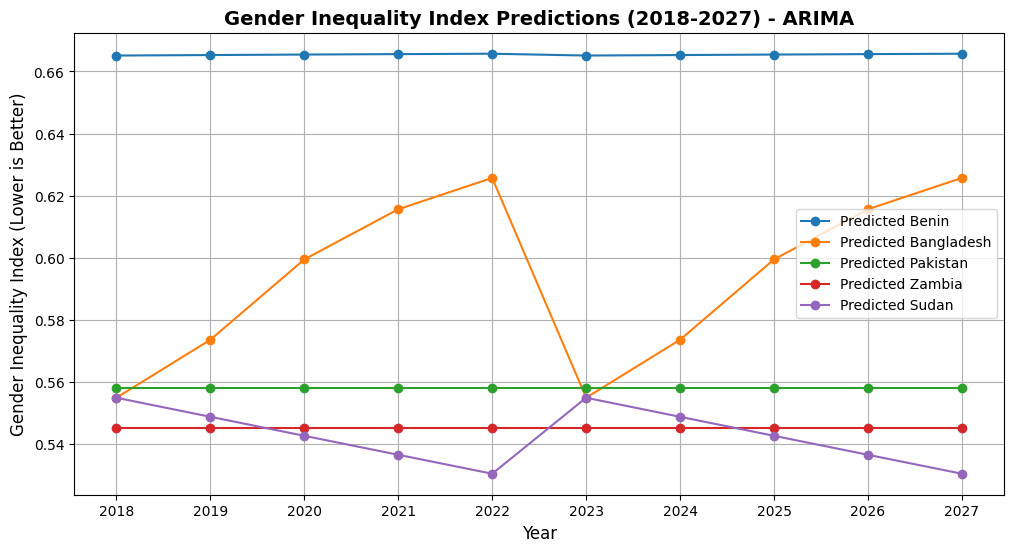

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
file_path = "data.csv"
gender = pd.read_csv(file_path)

# Ensure column names are properly formatted
gender.columns = gender.columns.str.strip()

# Filter dataset to include only Gender Inequality Index (GII) values
gender_gii = gender[gender['indicator'] == "Gender Inequality Index (value)"]

# Extract relevant columns: 'country', 'year', and 'value'
gender_gii = gender_gii[['country', 'year', 'value']]

# Pivot dataset to reshape it so that years become columns
gender_pivot = gender_gii.pivot(index='country', columns='year', values='value').dropna()

# Define training, validation, and future years
train_years = list(range(1990, 2018))
validation_years = list(range(2018, 2023))
future_years = list(range(2023, 2028))  # Future prediction years

# Identify training and validation columns
train_columns = [year for year in train_years if year in gender_pivot.columns]
validation_columns = [year for year in validation_years if year in gender_pivot.columns]

# Initialize dictionaries for predictions and actual values
validation_predictions = {}
validation_actual = {}
future_predictions = {}

# Train and predict using ARIMA for each country
for country in gender_pivot.index:
    y_train = gender_pivot.loc[country, train_columns].values.astype(float)
    y_val = gender_pivot.loc[country, validation_columns].values.astype(float)

    try:
        # Determine Best ARIMA Order Using AIC
        best_aic = float("inf")
        best_order = (1,1,1)
        for p in range(0, 3):
            for d in range(0, 2):
                for q in range(0, 3):
                    try:
                        model = ARIMA(y_train, order=(p, d, q))
                        results = model.fit()
                        if results.aic < best_aic:
                            best_aic = results.aic
                            best_order = (p, d, q)
                    except:
                        continue

        # Train ARIMA Model on Best Order
        final_model = ARIMA(y_train, order=best_order)
        final_results = final_model.fit()

        # Validate Model on 2018-2022
        forecast_validation = final_results.forecast(steps=len(y_val))
        validation_predictions[country] = forecast_validation
        validation_actual[country] = y_val

        # Predict Future GII (2023-2027)
        forecast_future = final_results.forecast(steps=len(future_years))
        future_predictions[country] = forecast_future

    except Exception as e:
        print(f"Skipping {country} due to error: {e}")

# Convert predictions and actual values to DataFrames
validation_df = pd.DataFrame.from_dict(validation_predictions, orient="index", columns=validation_columns)
actual_df = pd.DataFrame.from_dict(validation_actual, orient="index", columns=validation_columns)
future_df = pd.DataFrame.from_dict(future_predictions, orient="index", columns=future_years)

# Calculate Model Performance Metrics
mae = mean_absolute_error(actual_df.values.flatten(), validation_df.values.flatten())
mse = mean_squared_error(actual_df.values.flatten(), validation_df.values.flatten())
r2 = r2_score(actual_df.values.flatten(), validation_df.values.flatten())

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual_df.values.flatten() - validation_df.values.flatten()) / actual_df.values.flatten())) * 100
prediction_accuracy = 100 - mape  # Accuracy percentage

# Print Model Accuracy Metrics
print("\nModel Validation Accuracy Metrics (2018-2022) - ARIMA:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Prediction Accuracy: {prediction_accuracy:.2f}%")


# Compute the average predicted GII over 2023-2027 for each country
avg_future_gii = future_df.loc[:, 2023:2027].mean(axis=1)

# Select the 5 countries with the lowest average GII over the future years
top_5_countries = avg_future_gii.nsmallest(5).index.values

# Plot continuous Future Predictions including Tested Data (2018-2027)
plt.figure(figsize=(12, 6))
for country in top_5_countries:
    full_years = list(validation_columns) + list(future_years)  # 2018-2027
    full_values = list(validation_df.loc[country]) + list(future_df.loc[country])  # Actual (2018-2022) + Forecast (2023-2027)

    plt.plot(full_years, full_values, marker='o', linestyle='-', label=f"Predicted {country}")

plt.title("Gender Inequality Index Predictions (2018-2027) - ARIMA", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Gender Inequality Index (Lower is Better)", fontsize=12)
plt.xticks(range(2018, 2028))
plt.legend()
plt.grid(True)
plt.show()


# Select the 5 countries with the highest average GII over the future years
bottom_5_countries = avg_future_gii.nlargest(5).index.values

# Plot continuous Future Predictions including Tested Data (2018-2027)
plt.figure(figsize=(12, 6))
for country in bottom_5_countries:
    full_years = list(validation_columns) + list(future_years)  # 2018-2027
    full_values = list(validation_df.loc[country]) + list(future_df.loc[country])  # Actual (2018-2022) + Forecast (2023-2027)

    plt.plot(full_years, full_values, marker='o', linestyle='-', label=f"Predicted {country}")

plt.title("Gender Inequality Index Predictions (2018-2027) - ARIMA", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Gender Inequality Index (Lower is Better)", fontsize=12)
plt.xticks(range(2018, 2028))
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
file_path = "data.csv"
gender = pd.read_csv(file_path)

# Ensure column names are properly formatted
gender.columns = gender.columns.str.strip()

# Filter dataset to include only Gender Inequality Index (GII) values
gender_gii = gender[gender['indicator'] == "Gender Inequality Index (value)"]

# Extract relevant columns: 'country', 'year', and 'value'
gender_gii = gender_gii[['country', 'year', 'value']]

# Pivot dataset to reshape it so that years become columns
gender_pivot = gender_gii.pivot(index='country', columns='year', values='value').dropna()

# Define training, validation, and future years
train_years = list(range(1990, 2018))
validation_years = list(range(2018, 2023))
future_years = list(range(2023, 2028))  # Future prediction years

# Identify training and validation columns
train_columns = [year for year in train_years if year in gender_pivot.columns]
validation_columns = [year for year in validation_years if year in gender_pivot.columns]

# Initialize dictionaries for predictions and actual values
validation_predictions = {}
validation_actual = {}
future_predictions = {}

# Train and predict using ARIMA for each country
for country in gender_pivot.index:
    y_train = gender_pivot.loc[country, train_columns].values.astype(float)
    y_val = gender_pivot.loc[country, validation_columns].values.astype(float)

    try:
        # Determine Best ARIMA Order Using AIC
        best_aic = float("inf")
        best_order = (1,1,1)
        for p in range(0, 3):
            for d in range(0, 2):
                for q in range(0, 3):
                    try:
                        model = ARIMA(y_train, order=(p, d, q))
                        results = model.fit()
                        if results.aic < best_aic:
                            best_aic = results.aic
                            best_order = (p, d, q)
                    except:
                        continue

        # Train ARIMA Model on Best Order
        final_model = ARIMA(y_train, order=best_order)
        final_results = final_model.fit()

        # Validate Model on 2018-2022
        forecast_validation = final_results.forecast(steps=len(y_val))
        validation_predictions[country] = forecast_validation
        validation_actual[country] = y_val

        # Predict Future GII (2023-2027)
        forecast_future = final_results.forecast(steps=len(future_years))
        future_predictions[country] = forecast_future

    except Exception as e:
        print(f"Skipping {country} due to error: {e}")

# Convert predictions and actual values to DataFrames
validation_df = pd.DataFrame.from_dict(validation_predictions, orient="index", columns=validation_columns)
actual_df = pd.DataFrame.from_dict(validation_actual, orient="index", columns=validation_columns)
future_df = pd.DataFrame.from_dict(future_predictions, orient="index", columns=future_years)

# Calculate Model Performance Metrics
mae = mean_absolute_error(actual_df.values.flatten(), validation_df.values.flatten())
mse = mean_squared_error(actual_df.values.flatten(), validation_df.values.flatten())
r2 = r2_score(actual_df.values.flatten(), validation_df.values.flatten())

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual_df.values.flatten() - validation_df.values.flatten()) / actual_df.values.flatten())) * 100
prediction_accuracy = 100 - mape  # Accuracy percentage

# Print Model Accuracy Metrics
print("\nModel Validation Accuracy Metrics (2018-2022) - ARIMA:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Prediction Accuracy: {prediction_accuracy:.2f}%")


# Print Predicted Future GII Values for Top 5 and Bottom 5 Countries
print("\nPredicted Gender Inequality Index (2023-2027) values for Top 5 Countries:")
print(future_df.loc[gender_pivot.nsmallest(5, 2021).index.values])

print("\nPredicted Gender Inequality Index (2023-20267) values for Bottom 5 Countries:")
print(future_df.loc[gender_pivot.nlargest(5, 2021).index.values])

# Plot Future Predictions (2023-2027) for Top 5 Countries
plt.figure(figsize=(12, 6))
for country in gender_pivot.nsmallest(5, 2022).index.values:
    plt.plot(future_years, future_df.loc[country], marker='o', linestyle='-', label=f"Predicted {country}")

plt.title("Future Predictions: GII (2023-2027) - ARIMA", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Gender Inequality Index (Lower is Better)", fontsize=12)
plt.xticks(future_years)
plt.legend()
plt.grid(True)
plt.show()


# Plot Future Predictions (2023-2027) for Bottom 5 Countries
plt.figure(figsize=(12, 6))
for country in gender_pivot.nlargest(5, 2022).index.values:
    plt.plot(future_years, future_df.loc[country], marker='o', linestyle='-', label=f"Predicted {country}")

plt.title("Future Predictions: GII (2023-2027) - ARIMA", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Gender Inequality Index (Lower is Better)", fontsize=12)
plt.xticks(future_years)
plt.legend()
plt.grid(True)
plt.show()
